In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split  
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('input_data/review_full_text_tripadvisor.xlsx')
df.head(2)

,hotel_name,customer_name,title,full_content,rating,rating_New,label,title_content,text
0,Hotel des Arts Saigon Mgallery,Anh Tuấn L,Quá Tuyệt Vời Khi Ở Des Arts Sài Gòn,#HôtelDesArtsSaiGon là một sự trải nghiệm tuyệ...,bubble_50,5,like,Quá Tuyệt Vời Khi Ở Des Arts Sài Gòn. #HôtelDe...,tuyệt_vời trải_nghiệm tuyệt_vời ghé tươi thích...
1,Hotel des Arts Saigon Mgallery,TRƯƠNG BẰNG,Đáng đồng tiền!,"Dịch vụ cao cấp, phong cách chuyên nghiệp & tậ...",bubble_50,5,like,"Đáng đồng tiền!. Dịch vụ cao cấp, phong cách c...",đồng_tiền chuyên_nghiệp hơi thích_hợp chống tr...


In [3]:
df.shape

(78319, 9)

In [4]:
# Datasub
df_sub = df[['text', 'label']]

In [5]:
df_sub.head(2)

,text,label
0,tuyệt_vời trải_nghiệm tuyệt_vời ghé tươi thích...,like
1,đồng_tiền chuyên_nghiệp hơi thích_hợp chống tr...,like


In [6]:
# kiểm tra dữ liệu na/null
df_sub.isna().sum()

text     0
label    0
dtype: int64

In [7]:
df_sub.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
# xóa dữ liệu trùng
df_sub = df_sub.drop_duplicates()

In [9]:
df_sub.shape

(78183, 2)

In [10]:
# không có dữ liệu na/null
# có dữ liệu trùng

In [11]:
df_sub.label.value_counts()

like        66848
not_like    11335
Name: label, dtype: int64

In [12]:
# Tỉ lệ like vs not_like: 6:1

In [13]:
y_class = {'like':1, 'not_like':0}
df_sub['y'] = [y_class[i] for i in df_sub.label]

In [14]:
df_sub.tail(10)

,text,label,y
78309,dừng phân_bổ không_khí tốt toàn thăm miễn_phí ...,not_like,0
78310,thích cứng tốt không_phàn_nàn lịch_sự sạch_sẽ ...,not_like,0
78311,rẻ nhấn_mạnh rẻ sạch_sẽ tổ_chức tốt rẻ đấu côn...,not_like,0
78312,ngờ lạnh xà_phòng rửa rửa ồn_ào khuyên tốt,like,1
78313,ngắn quá_cảnh phù_hợp_thời ngắn hà nguyên đồng...,not_like,0
78314,tốt buồn_cười hiển_thị xây_dựng dễ_thương cứng...,not_like,0
78315,tốt lũng đồng_văn cổ nhàm_chán chảy đừng lãng_...,not_like,0
78316,rẻ tổng_hợp hết_sức thái rẻ,not_like,0
78317,tuyệt_vời đẹp tốt mặc_dù tốt_đẹp tốt thuê tốt ...,like,1
78318,nhiên khác_biệt tóm ổn nhiên tiêu_chuẩn không_...,not_like,0


In [15]:
df_sub.head()

,text,label,y
0,tuyệt_vời trải_nghiệm tuyệt_vời ghé tươi thích...,like,1
1,đồng_tiền chuyên_nghiệp hơi thích_hợp chống tr...,like,1
2,chú_ý lướt đắm chìm bình_yên thoải_mái thân_th...,like,1
3,thích ngắm tròn thư_thái lắm thượng bơi nối ng...,like,1
4,không_lớn lắm trí đứng thân_thiện đẹp mừng ngắ...,like,1


In [16]:
df_sub_like = df_sub[df_sub.y==1]

In [17]:
df_sub_notlike = df_sub[df_sub.y==0]

### Visualization Like & Not Like

In [18]:
from wordcloud import WordCloud

In [19]:
# Like
wc_like = WordCloud(
    background_color='black',
    max_words=500
)
# generate the word cloud
wc_like.generate(str(df_sub_like['text'].values))

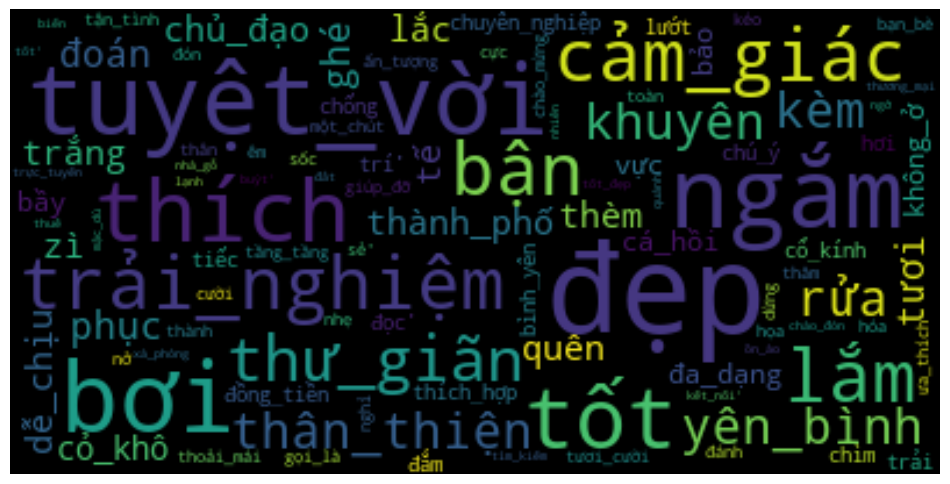

In [20]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_like, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Not Like
wc_notlike = WordCloud(
    background_color='black',
    max_words=500    
)
# generate the word cloud
wc_notlike.generate(str(df_sub_notlike['text'].values))

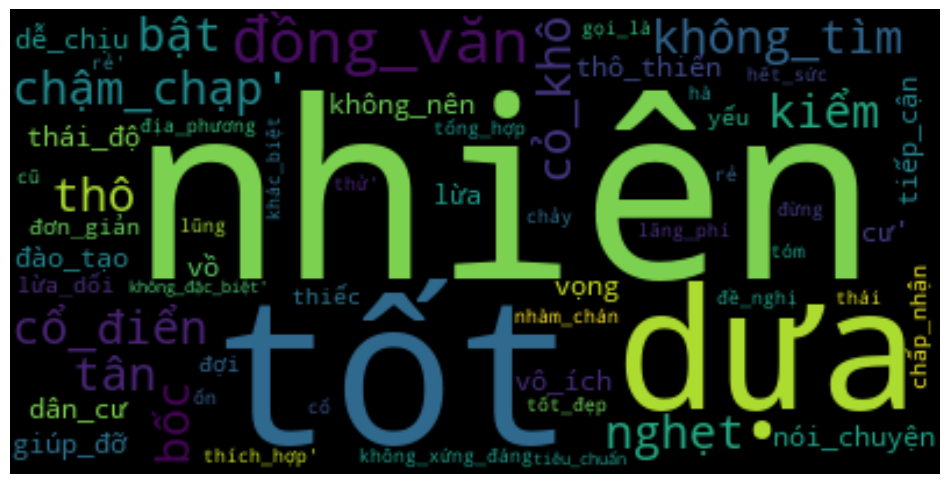

In [22]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_notlike, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# Còn từ "tốt", khả năng vẫn còn lẫn mẫu "like" là "not like", thử kiểm tra

### Build Model

In [24]:
# x, y
X = df_sub['text']
y = df_sub['y']

In [25]:
X.head()

0    tuyệt_vời trải_nghiệm tuyệt_vời ghé tươi thích...
1    đồng_tiền chuyên_nghiệp hơi thích_hợp chống tr...
2    chú_ý lướt đắm chìm bình_yên thoải_mái thân_th...
3    thích ngắm tròn thư_thái lắm thượng bơi nối ng...
4    không_lớn lắm trí đứng thân_thiện đẹp mừng ngắ...
Name: text, dtype: object

In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state = 42)

In [47]:
X_train.head()

6991     tồi_tệ không_ở bảo_trì kém cũ trải không_giờ đ...
35661    tuyệt dịch_vụ tốt bơi tốt tuyệt tốt thoải_mái ...
30100    đừng cập nhà_hàng tồi_tệ đắt đẹp lừa xông mát ...
50404              phục_vụ nhà_hàng hợp tươi_cười nhà_hàng
32296           hài_lòng tiện hàng thân_thiện sơn chúc đẹp
Name: text, dtype: object

In [28]:
pipe_line = Pipeline([          
            ("vect", CountVectorizer()),#bag-of-words
            ("tfidf", TfidfTransformer()),#tf-idf
            ("clf", LogisticRegression()) #model logistic regression sẽ được hướng dẫn sau
        ])

In [29]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [30]:
pipe_line.score(X_train, y_train)

0.9483079959070312

In [31]:
pipe_line.score(X_test, y_test)

0.9397996162865061

In [32]:
# Với kết quả trên: model không bị underfiting / overfiting


In [33]:
y_testhat = pipe_line.predict(X_test)

In [34]:
# Xem kết quả thống kê
print(confusion_matrix(y_test, y_testhat))  
print(classification_report(y_test, y_testhat))  

[[ 2373  1047]
 [  365 19670]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      3420
           1       0.95      0.98      0.97     20035

    accuracy                           0.94     23455
   macro avg       0.91      0.84      0.87     23455
weighted avg       0.94      0.94      0.94     23455



In [41]:
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_testhat)

In [42]:
fpr


array([0.        , 0.30614035, 1.        ])

In [43]:
tpr


array([0.        , 0.98178188, 1.        ])

In [44]:
# calculate AUC
auc = metrics.roc_auc_score(y_test, y_testhat)
print('AUC: %.3f' % auc)

AUC: 0.838


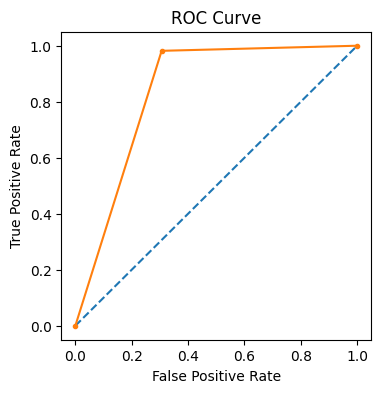

In [45]:
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [46]:
# recall của not_like chưa cao nhưng tạm ổn